<h1>Clustering </h1>
    <h3>k-means++:</h3> 
    k-means++ pursues this by assigning the first centroid to the location of a randomly selected data point, and then  choosing the subsequent centroids from the remaining data points based on a probability proportional to the squared distance away from a given point's nearest existing centroid
    
    The K-means clustering algorithm is used to find groups which have not been explicitly labeled in the data. 
    

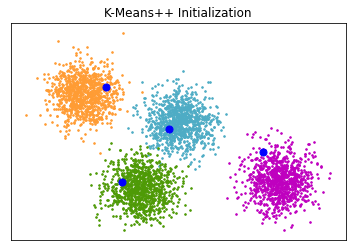

In [3]:
from sklearn.cluster import kmeans_plusplus
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate sample data
n_samples = 4000
n_components = 4

X, y_true = make_blobs(
    n_samples=n_samples, centers=n_components, cluster_std=0.60, random_state=0
)
X = X[:, ::-1]

# Calculate seeds from kmeans++
centers_init, indices = kmeans_plusplus(X, n_clusters=4, random_state=0)

# Plot init seeds along side sample data
plt.figure(1)
colors = ["#4EACC5", "#FF9C34", "#4E9A06", "m"]

for k, col in enumerate(colors):
    cluster_data = y_true == k
    plt.scatter(X[cluster_data, 0], X[cluster_data, 1], c=col, marker=".", s=10)

plt.scatter(centers_init[:, 0], centers_init[:, 1], c="b", s=50)
plt.title("K-Means++ Initialization")
plt.xticks([])
plt.yticks([])
plt.show()

<h1>Dataset</h1>
    <h3>Plot randomly generated multilabel dataset</h3>
A star marks the expected sample for each class; its size reflects the probability of selecting that class label.

The left and right examples highlight the n_labels parameter: more of the samples in the right plot have 2 or 3 labels.

Note that this two-dimensional example is very degenerate: generally the number of features would be much greater than the “document length”, while here we have much larger documents than vocabulary. Similarly, with n_classes > n_features, it is much less likely that a feature distinguishes a particular class.

    Generate a random n-class classification problem. This initially creates clusters of points normally distributed (std=1) about vertices of an n_informative -dimensional hypercube with sides of length 2*class_sep and assigns an equal number of clusters to each class.

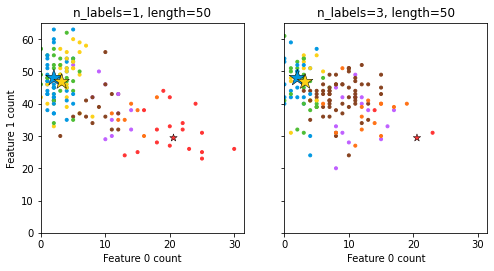

The data was generated from (random_state=908):
Class	P(C)	P(w0|C)	P(w1|C)
red	0.16	0.41	0.59
blue	0.43	0.04	0.96
yellow	0.41	0.06	0.94


In [4]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_multilabel_classification as make_ml_clf

COLORS = np.array(
    [
        "!",
        "#FF3333",  # red
        "#0198E1",  # blue
        "#BF5FFF",  # purple
        "#FCD116",  # yellow
        "#FF7216",  # orange
        "#4DBD33",  # green
        "#87421F",  # brown
    ]
)

# Use same random seed for multiple calls to make_multilabel_classification to
# ensure same distributions
RANDOM_SEED = np.random.randint(2 ** 10)


def plot_2d(ax, n_labels=1, n_classes=3, length=50):
    X, Y, p_c, p_w_c = make_ml_clf(
        n_samples=150,
        n_features=2,
        n_classes=n_classes,
        n_labels=n_labels,
        length=length,
        allow_unlabeled=False,
        return_distributions=True,
        random_state=RANDOM_SEED,
    )

    ax.scatter(
        X[:, 0], X[:, 1], color=COLORS.take((Y * [1, 2, 4]).sum(axis=1)), marker="."
    )
    ax.scatter(
        p_w_c[0] * length,
        p_w_c[1] * length,
        marker="*",
        linewidth=0.5,
        edgecolor="black",
        s=20 + 1500 * p_c ** 2,
        color=COLORS.take([1, 2, 4]),
    )
    ax.set_xlabel("Feature 0 count")
    return p_c, p_w_c


_, (ax1, ax2) = plt.subplots(1, 2, sharex="row", sharey="row", figsize=(8, 4))
plt.subplots_adjust(bottom=0.15)

p_c, p_w_c = plot_2d(ax1, n_labels=1)
ax1.set_title("n_labels=1, length=50")
ax1.set_ylabel("Feature 1 count")

plot_2d(ax2, n_labels=3)
ax2.set_title("n_labels=3, length=50")
ax2.set_xlim(left=0, auto=True)
ax2.set_ylim(bottom=0, auto=True)

plt.show()

print("The data was generated from (random_state=%d):" % RANDOM_SEED)
print("Class", "P(C)", "P(w0|C)", "P(w1|C)", sep="\t")
for k, p, p_w in zip(["red", "blue", "yellow"], p_c, p_w_c.T):
    print("%s\t%0.2f\t%0.2f\t%0.2f" % (k, p, p_w[0], p_w[1]))

<h1>Feature Selection</h1>
<h3>Model-based and sequential feature</h3>
Feature selection is a technique where we choose those features in our data that contribute most to the target variable

In [14]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target


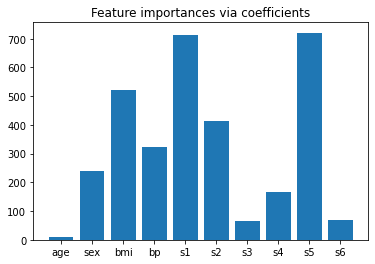

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import RidgeCV

ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X, y)
importance = np.abs(ridge.coef_)
feature_names = np.array(diabetes.feature_names)
plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients")
plt.show()